# 연속형 확률변수

In [1]:
!git clone https://github.com/KDT-study/Statistics.git

Cloning into 'Statistics'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 107 (delta 49), reused 105 (delta 49), pack-reused 0
Receiving objects: 100% (107/107), 8.14 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3 
# 소수점 3자리까지 표현
%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드

In [3]:
from scipy import integrate # 적분을 위한 모듈
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

확률 변수가 가질 수 있는 값의 형태에 따라 이산형 확률 변수와 연속형 확률 변수로 구분


**이산형(Discrete) 확률 변수**
- 확률 변수가 가질 수 있는 값들을 셀 수 있는 경우
- 사례 : 동전던지기, 주사위 던지기 등




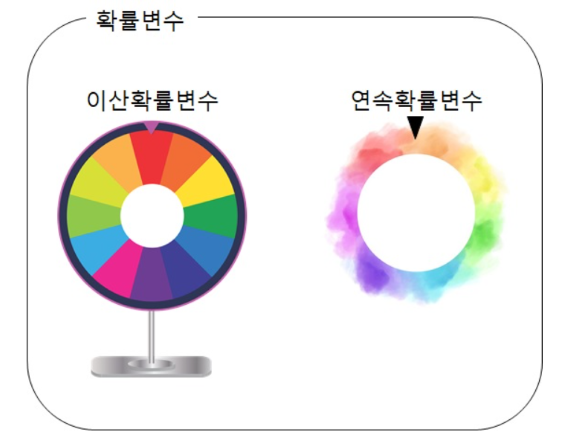

룰렛을 실제로 돌리기 전에 그 결과를 알 수는 없고, 돌리고 나서야 결과를 확인할 수 있기 때문에 룰렛에 있는 모든 칸들은 확률변수

*   이산확률변수 : 어느색에 멈추게 될지 경계가 뚜렷함(경우의 수가 한정됨)
*   연속확률변수 : 경계면이 뚜렷하지 않아서 경우의 수가 무한

Reference : https://netpilgrim.net/1635

연속 확률 변수의 값은 실수(real number) 집합처럼 연속적이고 무한개의 경우의 수를 가진다. 


변수의 값이 정수(integer)와 같이 연속이 아닌 이산적인(discrete) 값을 가지면 이산 확률 변수(discrete random variable)라고 한다.
[Reference](https://velog.io/@groovallstar/%ED%99%95%EB%A5%A0-%EB%B6%84%ED%8F%AC-%ED%95%A8%EC%88%98%EC%99%80-%ED%99%95%EB%A5%A0-%EB%B0%80%EB%8F%84-%ED%95%A8%EC%88%98%EC%9D%98-%EC%9D%98%EB%AF%B8)



이산 : 헤어져 흩어지는 것

discret : 분리한, 구별된, 개별적인, 불연속의, 추상적인

연속형 확률변수에서는 확률변수가 어느 구간에 들어가는 확률을 정의

예) 룰렛이 0.4부터 0.6 사이의 값이 나올 확률이 0.2

## 1차원 연속형 확률변수

### 1차원 연속형 확률변수의 정의

**확률밀도함수(probability desnity function, PDF)**

$$
f(x) = P(X=x)
$$

X가 x0에서 x1 사이의 구간에 들어갈 확률 P로 정의 (p.174)

$$
P(x_0 \le X \le x_1) = \int_{x_0}^{x_1} f(x) dx
$$


적분을 계산하는 방법을 몰라도 괜찮습니다.

밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념을 파악하는 것으로 충분! (p.174)

불공정한 룰렛으로 예를들어 구현해봅시다.

취할 수 있는 값의 구간에 대해 하한과 상한을 x_range로 정의



불공정한 룰렛의 밀도함수

$$
f(x) = \begin{cases}2x \quad(0\le x\le1)\\0 \;\:\quad(otherwise)\end{cases}​
$$

In [4]:
x_range = np.array([0, 1])

In [5]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

x_range와 f의 세트가 확률분포.




In [6]:
X = [x_range, f]

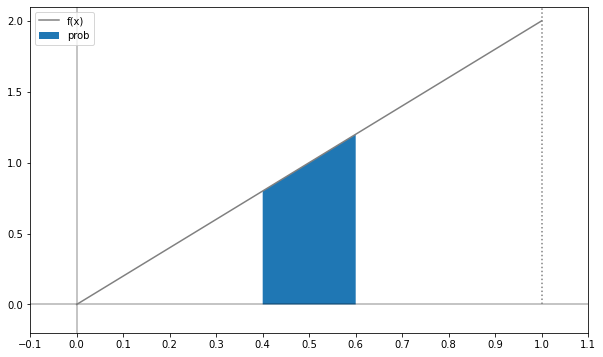

In [7]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
# 수평선 hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs) alpha 투명도 조절
ax.hlines(0, -0.2, 1.2, alpha=0.3) 
# 수직선 vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', **kwargs)
ax.vlines(0, -0.2, 2.2, alpha=0.3) 
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [8]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
# quad 함수는 적분값과 추정오차를 반환
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

연속형 확률 변수에서는 확률의 성질로 다음 두식을 만족해야 합니다.
$$
f(x) \ge 0
$$
$$
\int_{-\infty}^{\infty} f(x) dx = 1
$$

In [9]:
# minimize_scalar는 함수의 최솟값을 구하는 함수. 
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun
# res

0

In [10]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

참고 : f(x)를 2x로 놓은 이유는 적분 결과를 1로 만들기 위해서임 

**누적분포함수(cumulative distrivution function, CDF)**

확률변수 X가 x이하가 될때의 확률을 반환하는 함수 F(x)

$$
F(x) = P(X \le x) = \int_{-\infty}^{x} f(x) dx
$$

In [11]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [12]:
F(0.6) - F(0.4)

0.200

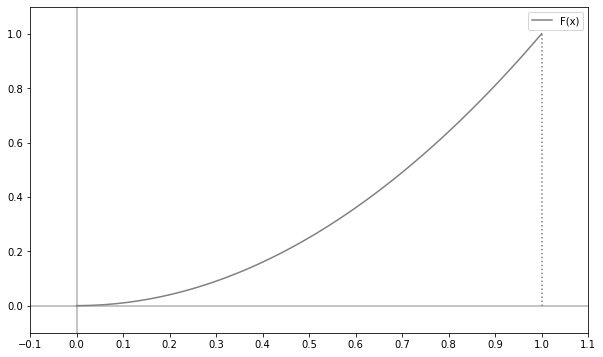

In [13]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3) # 수평선 hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs) alpha 투명도 조절
ax.vlines(0, -0.1, 1.1, alpha=0.3) # 수직선 vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', **kwargs)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

**확률변수의 변환**


룰렛의 예에서 나오는 값에 2를 곱하고 3을 더한 2X+3을 사용한다. 이것을 Y라고 하면, Y도 연속형 확률변수가 된다.
Y의 밀도함수를 g(y)라고 하면 다음과 같다.

$$
g(y) = \begin{cases}(y-3)/2 \quad(3\le y\le5)\\0 \;\:\quad(otherwise)\end{cases}​
$$

Y = 2X + 3 => X=(Y-3)/2

(누적)분포함수는 G(y)라고 하면


$$
G(y) = P(Y \le y) = \int_{-\infty}^{y} g(x) dy
$$


In [14]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0] # quad 함수는 적분값과 추정오차를 반환

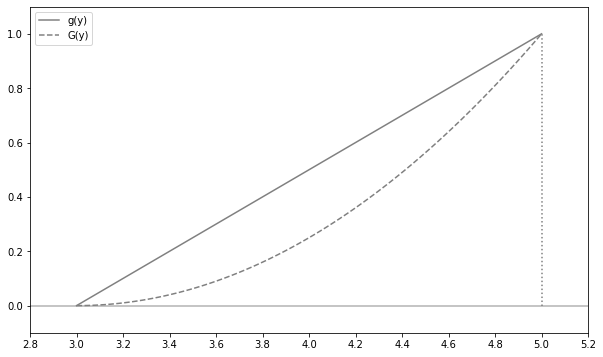

In [15]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)  # 수평선 hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs) alpha 투명도 조절
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray') # 수직선 vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', **kwargs)

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률분포의 지표

(p.112 5장)

이산형 확률변수의 경우, 확률변수의 평균은 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합으로 정의

확률변수의 평균은 기댓값(expected value) 
$$
E(X) = \sum_{k}^{} x_k f(x_k)
$$


(p.183 7장)
**기댓값**

연속형 확률변수 X의 평균
$$
\mu = E(X) = \int_{-\infty}^{\infty} xf(x) dx
$$

불공정한 룰렛의 기댓값

#### 평균

In [16]:
def integrand(x): # intergrand 뜻은 피적분함수
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0] # quad 함수는 적분값과 추정오차를 반환

0.667

불공정한 룰렛의 밀도함수

$$
f(x) = \begin{cases}2x \quad(0\le x\le1)\\0 \;\:\quad(otherwise)\end{cases}​
$$


기댓값
 
 $$ 
 \mu = E(X) =  \int_{0}^{1} 2x^2 dx = \left[\frac{2}{3} * x^{3} \right]_{0}^{1} = \frac{2}{3} \approx 0.66667
 $$
 
 

(참고 적분공식)

$$
\int x^n dx =  \frac {x^{n+1}}{n+1} + C \quad (for \quad n \neq -1)
 $$


변환한 확률변수의 기댓값
확률변수 X를 2X+3으로 변환한 확률변수 Y의 기댓값

 $$ 
E(Y) = E(2X+3) = \int_{-\infty}^{\infty} (2x+3)f(x) dx 
$$
 

연속형 확률변수의 기댓값

$$
E(g(X)) = \int_{-\infty}^{\infty} g(x)f(x) dx 
$$

In [17]:
def E(X, g=lambda x: x): # g(x) = x # def E(X, g(x))
    x_range, f = X # x_range 범위를 정의역으로 하는 밀도함수 f(x) =>X 확률변수 
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0] # quad 함수로 적분값 반환

In [18]:
E(X)

0.667

In [19]:
E(X, g=lambda x: 2*x+3) # g(x) = 2x+3

4.333

[울프람알파 계산결과](https://www.wolframalpha.com/input/?i=integrate+4x%5E2%2B6x+from+0+to+1)


연속형 확률변수에서도 기댓값의 선형성 성립
E(2X+3)과 2E(X)+3 이 동일하다는 것을 확인해봅시다

In [20]:
2 * E(X) + 3

4.333

[울프람알파 계산결과](https://www.wolframalpha.com/input/?i=2*0.6666666666666666+%2B3)

#### 분산

연속형 확률변수 X의 분산은 다음과 같이 정의

$$
\sigma^2 = V(X) =  \int_{-\infty}^{\infty} (x-\mu)^2f(x) dx 
$$

분산은 x에 대한 편차 제곱의 기댓값


편차는 평균값으로부터의 차이


In [21]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

[울프람알파 계산결과](https://www.wolframalpha.com/input/?i=integrate+%28x-0.6666666666666666%29%5E2*2x+from+0+to+1)

연속형 확률변수의 분산

$$
V(g(X)) =  \int_{-\infty}^{\infty} \Big(g(x)-E(g(x)) \Big)^2f(x) dx 
$$

In [22]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [23]:
V(X)

0.056

In [24]:
V(X, lambda x: 2*x + 3)

0.222

[울프람알파 계산결과](https://https://www.wolframalpha.com/input/?i=integrate+%282x%2B3+-4.333%29%5E2*2x+from+0+to+1)

In [25]:
2**2 * V(X)

0.222

[울프람알파 계산결과](https://www.wolframalpha.com/input/?i=2%5E2+*+0.05555555555555556)

## 2차원 연속형 확률분포

### ２차원 연속형 확률변수의 정의

**결합확률밀도함수**

2차원 연속형 확률변수 (X, Y)는 확률변수가 취할 수 있는 값의 조합

$$
\{(x,y) | a \le x \le b ;\quad c \le y \le d \}
$$

과 이것을 정의역으로 하는 함수 

$$
f(x,y)
$$

에 의해 정의됩니다.

이 함수 f(x,y)를 결합확률밀도함수라하고, 
$$ x_0 \le X \le x_1$$ 및 $$ y_0 \le Y \le y_1$$ 이 되는 확률은 다음과 같이 정의합니다.

$$
P(x_0 \le X \le x_1, y_0 \le Y \le y_1) = \int_{x_0}^{x_1}\int_{y_0}^{y_1} f(x,y) dxdy 
$$

2차원 확류변수의 구체적인 예로, 2개의 불공정한 룰렛을 사용


불공정한 룰렛 A, B 두가지를 돌려, A의 값과 B의 값을 더한 것을 확률변수 X, A의 값을 확률변수 Y로 한 2차원 확률변수 (X,Y)가 있다.

이 확률변수 (X,Y)가 취할 수 있는 값은 

$$
\{0 \le X \le 2,\quad 0 \le Y \le 1\}
$$

이고, 결합확률밀도함수는 다음과 같습니다.


$$
f(x,y) = \begin{cases}4y(x-y) \quad(0 \le y \le 1 \quad and \quad 0 \le x - y \le 1) \\0 \;\:\quad(otherwise)\end{cases}​
$$

**확률의 성질** 


2차원 연속형 확률변수는 확률의 성질로서 다음의 두 가지를 만족해야 합니다.

$$
f(x,y) \geq 0
$$

$$
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y) = 1 
$$

우선 X와 Y가 취할 수 있는 값을 각각 x_range와 y_range 정의

In [26]:
x_range = [0, 2]
y_range = [0, 1]

결합확률밀도함수 정의

In [27]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

확률변수 (X,Y)의 움직임은 x_range, y_range와 f_xy에 정의되므로, 이것들을 리스트로 XY라고 합시다.

In [28]:
XY = [x_range, y_range, f_xy]

결합확률밀도함수 히트맵 그리기

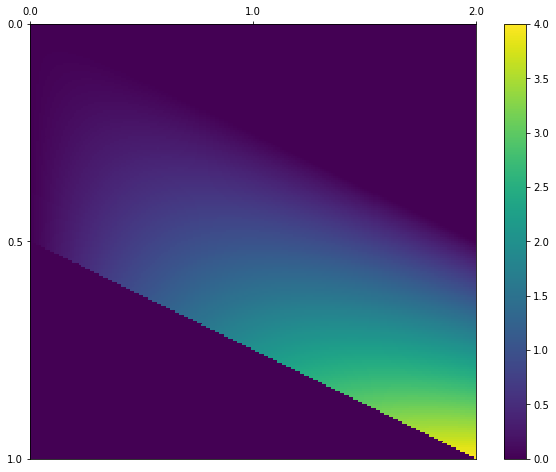

In [29]:
xs = np.linspace(x_range[0], x_range[1], 200) # def linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) 
# Returns num evenly spaced samples, calculated over the interval [start, stop].

ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd) # Create a pseudocolor plot with a non-regular rectangular grid.
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

**확률의 성질**

$$
f_{xy} \geq 0
$$

을 만족하고 있다는 것은 함수의 정의와 히트맵을 통해 확인할 수 있습니다.

다음으로 적분 결과가 1이 되는지 확인합니다.
함수를 x와 y의 두 변수로 적분해야 하기 때문에 다중적분에는 integrate.nquad를 사용합니다.

In [30]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.000

**주변확률밀도함수**
확률변수 (X,Y)는 결합확률밀도함수에 의해 X와 Y가 동시에 정의되지만, 각각의 확률변수에만 흥미가 있을 수 있음

확률변수 X의 밀도함수 fx(X)

X의 주변확률밀도함수 또는 주변밀도함수

$$
f_x(x) = \int_{-\infty}^{\infty} f(x,y)dy
$$


파이썬의 표준 라이브러리에 있는 functools의 partial 함수사용


partial은 인수의 일부를 고정한 새로운 함수를 만들 수 있는 함수
partial(f_xy, x)라고 하면 함수 f_xy의 인수 x,y 중 x가 고정되고, 인수가 y만으로만 된 함수가 반환됨

이렇게 얻은 함수는 integrate.quad로 적분할 수 있는 1변수함수가 됨.

[주변확률분포 참고자료](https://m.blog.naver.com/mykepzzang/220837645914)

In [31]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [32]:
X = [x_range, f_X]
Y = [y_range, f_Y]

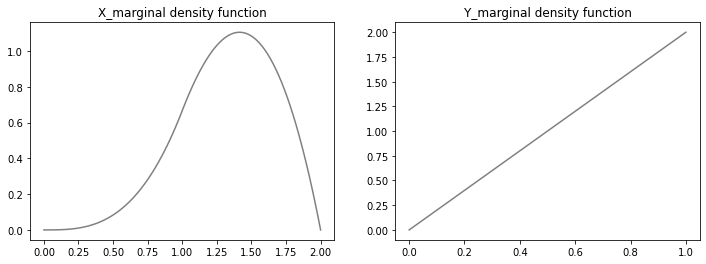

In [33]:
xs = np.linspace(*x_range, 100)  # *를 list앞에 붙히면 값만 불러옴 => *[0,2] = 0 2
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

xs = np.linspace(*x_range, 100) 관련 테스트

In [34]:
# xs = np.linspace(*x_range, 100) 
# xs

In [35]:
# xs = np.linspace(x_range[0],x_range[1], 100) 
# xs

[linspace(리스트, ~) 형태 참고자료](https://https://heartbeat.fritz.ai/exploring-numpys-linspace-function-bb3378f8dcd8)

In [36]:
# xs = np.linspace(x_range, 100) # def linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) 
# xs

In [37]:
# xs.shape

In [38]:
# print(*x_range)

### ２차원 연속형 확률변수의 지표

#### 기댓값

복습

2차원 이산형 확률변수의 기댓값 (p.136)
$$
\mu_x = E(X) = \sum_{i}\sum_{j}x_i f_{XY}(x_i,y_j)
$$


2차원 연속형 확률변수의 기댓값
$$
\mu_x = E(X) = \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty} xf(x,y) dx dy
$$

In [39]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.333

복습

2차원 이산형 확률변수 X,Y의 함수 g(X,Y)의 기대값

$$
E(g(X,Y)) = \sum_{i}\sum_{j} g_{XY}(x_i,y_j)
 f_{XY}(x_i,y_j)
$$

2차원 연속형 확률변수 X,Y의 함수 g(X,Y)의 기댓값

$$
E(g(X,Y)) = \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty} g(x,y)f(x,y) dx dy
$$

In [40]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [41]:
mean_X = E(XY, lambda x, y: x) # g(x,y) = x
mean_X

1.333

In [42]:
mean_Y = E(XY, lambda x, y: y)  # g(x,y) = y
mean_Y

0.667

In [43]:
a, b = 2, 3

In [44]:
E(XY, lambda x, y: a*x + b*y) # g(x,y) = 2x + 3y

4.667

기댓값의 선형성 성립


$$
E(2X+3Y) = 2E(X) + 3E(Y)
$$

In [45]:
a * mean_X + b * mean_Y

4.667

#### 분산

복습

2차원 이산형 확률변수의 분산


X에 관한 편차 제곱의 기댓값
$$
{\sigma_x}^2 = V(X) = \sum_{i}\sum_{j} (x_i - \mu_X)^2  f_{XY}(x_i,y_j)
$$

2차원 연속형 확률변수의 분산

$$
{\sigma_x}^2 = V(X) = \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty}  (x_i - \mu_X)^2  f_{XY}(x_i,y_j) dxdy
$$

In [46]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.111

복습

이산형 확률변수 X,Y의 함수 g(X,Y)의 분산

$$
{\sigma_x}^2 = V(g(X,Y)) = \sum_{i}\sum_{j} (g(x_i,y_j)-E(g(X,Y)))^2 f_{XY}(x_i,y_j)
$$

연속형 변수 X,Y에 대한 함수 g(X,Y)의 분산

$$
V(g(X,Y)) \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty}  (g(x,y)-E(g(X,Y)))^2 f(x,y) dxdy
$$

In [47]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [48]:
var_X = V(XY, lambda x, y: x) # g(x,y) = x
var_X

0.111

In [49]:
var_Y = V(XY, lambda x, y: y) # g(x,y) = y
var_Y

0.056

In [50]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [51]:
cov_xy = Cov(XY)
cov_xy

0.056

복습(p.141)
**분산과 공분산의 공식**
$$
V(aX+bY) = a^2V(X) + b^2V(Y)+2abCov(X,Y)
$$

In [52]:
V(XY, lambda x, y: a*x + b*y) 

1.611

In [53]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

상관계수

In [54]:
cov_xy / np.sqrt(var_X * var_Y)

0.707